# Comparação MZmine/pyOpenMS

In [1]:
import pandas as pd

feat = pd.read_csv('results/f9e3f27_feat.csv')
feat.head()

,row ID,row m/z,row retention time,intensity_measure,s200525_Dog_Blank_01.mzXML Peak area,s200525_Dog_4h_02.mzXML Peak area,s200525_Dog_4h_03.mzXML Peak area,s200525_Dog_4h_01.mzXML Peak area,s200525_Dog_Blank_03.mzXML Peak area,s200525_Dog_Blank_02.mzXML Peak area,...,s200525_Mou_4h_03.mzXML Peak area,s200525_Mou_4h_02.mzXML Peak area,s200525_Rat_4h_02.mzXML Peak area,s200525_Mou_Blank_03.mzXML Peak area,s200525_Rat_Blank_02.mzXML Peak area,s200525_Rat_4h_01.mzXML Peak area,s200525_Rat_Blank_03.mzXML Peak area,s200525_Rat_4h_03.mzXML Peak area,s200525_Rat_Blank_01.mzXML Peak area,Unnamed: 33
0,1,568.299541,33.925083,area,8.065419e+07,7.794631e+07,7.938951e+07,7.949309e+07,7.707818e+07,7.954920e+07,...,3.788302e+07,3.128927e+07,7.469028e+07,7.493711e+07,7.459483e+07,7.459669e+07,7.761065e+07,7.766036e+07,7.528491e+07,NaN
1,2,573.254828,33.918372,area,7.002323e+07,6.818548e+07,7.086606e+07,6.946290e+07,6.465168e+07,6.862157e+07,...,7.465150e+07,6.414286e+07,6.895838e+07,6.878195e+07,6.911714e+07,6.873856e+07,7.406526e+07,7.415805e+07,6.869015e+07,NaN
2,3,304.299661,34.210333,area,8.811130e+06,8.595674e+06,8.576442e+06,8.668024e+06,8.721768e+06,8.681372e+06,...,9.680476e+06,8.788321e+06,9.641693e+06,8.829966e+06,8.595865e+06,7.023870e+06,6.974862e+06,8.650843e+06,8.536900e+06,NaN
3,4,381.081324,1.804906,area,2.464462e+07,2.368617e+07,2.624698e+07,3.131896e+07,2.403872e+07,2.400652e+07,...,2.382829e+07,2.164969e+07,2.064907e+07,2.484689e+07,2.105007e+07,2.081215e+07,1.923356e+07,2.015628e+07,2.124180e+07,NaN
4,5,332.332161,34.492267,area,1.448463e+07,1.429377e+07,1.405203e+07,1.418293e+07,1.435455e+07,1.443068e+07,...,1.473611e+07,1.473844e+07,1.433900e+07,1.456569e+07,1.165663e+07,1.178992e+07,1.438783e+07,1.441127e+07,1.175091e+07,NaN


In [2]:
feat.columns.str.replace('^s| Peak area', '', regex=True)

Index(['row ID', 'row m/z', 'row retention time', 'intensity_measure',
       '200525_Dog_Blank_01.mzXML', '200525_Dog_4h_02.mzXML',
       '200525_Dog_4h_03.mzXML', '200525_Dog_4h_01.mzXML',
       '200525_Dog_Blank_03.mzXML', '200525_Dog_Blank_02.mzXML',
       '200525_HUMAN_4h_01.mzXML', '200525_HUMAN_4h_02.mzXML',
       '200525_HUMAN_Blank_02.mzXML', '200525_HUMAN_4h_03.mzXML',
       '200525_HUMAN_Blank_01.mzXML', '200525_Mk_4h_02.mzXML',
       '200525_Mk_4h_03.mzXML', '200525_HUMAN_Blank_03.mzXML',
       '200525_Mk_4h_01.mzXML', '200525_Mk_Blank_02.mzXML',
       '200525_Mk_Blank_03.mzXML', '200525_Mou_4h_01.mzXML',
       '200525_Mk_Blank_01.mzXML', '200525_Mou_Blank_01.mzXML',
       '200525_Mou_Blank_02.mzXML', '200525_Mou_4h_03.mzXML',
       '200525_Mou_4h_02.mzXML', '200525_Rat_4h_02.mzXML',
       '200525_Mou_Blank_03.mzXML', '200525_Rat_Blank_02.mzXML',
       '200525_Rat_4h_01.mzXML', '200525_Rat_Blank_03.mzXML',
       '200525_Rat_4h_03.mzXML', '200525_Rat_Blank_01.m

In [3]:
feat.columns = feat.columns.str.replace('^s| Peak area', '', regex=True)
feat.columns = feat.columns.str.replace('mzXML', 'mzML', regex=True)

In [5]:
skip = list(range(26))
skip.pop(1)
feat2 = pd.read_csv('results/FeatureQuantificationTable.txt', skiprows=skip, sep='\t')
feat2.head()

,#CONSENSUS,rt_cf,mz_cf,intensity_cf,charge_cf,width_cf,quality_cf,rt_0,mz_0,intensity_0,...,rt_22,mz_22,intensity_22,charge_22,width_22,rt_23,mz_23,intensity_23,charge_23,width_23
0,CONSENSUS,2200.665487,538.867185,196611.0,1,0.0,0.000316,2203.194857,538.869453,186130.0,...,2200.177850,538.869335,200974.3,1.0,14.626923,2202.876317,538.869494,185023.6,1.0,12.237026
1,CONSENSUS,2115.935772,853.581182,596913.8,1,0.0,0.001133,2115.629556,853.584867,659714.7,...,2115.621556,853.585455,552015.3,1.0,8.582089,2115.292573,853.584908,649376.0,1.0,12.295233
2,CONSENSUS,156.363456,678.003012,1122211.0,1,0.0,0.001952,158.383161,678.004918,1454058.0,...,154.839299,678.003900,860628.2,1.0,41.949783,155.480343,678.004822,1568731.0,1.0,46.171139
3,CONSENSUS,2131.169970,423.256221,472676.8,1,0.0,0.000798,2130.733571,423.257087,478337.6,...,2130.727321,423.256054,479524.5,1.0,13.695047,2130.399769,423.256931,483673.7,1.0,10.952423
4,CONSENSUS,2099.446080,790.587144,1614218.0,1,0.0,0.003364,2100.535538,790.588895,1608213.0,...,2097.506635,790.589334,1643221.0,1.0,11.617233,2100.195376,790.590012,1558721.0,1.0,9.070837


In [6]:
feat2[['mz_cf', 'intensity_cf']].to_numpy()

array([[5.38867185e+02, 1.96611000e+05],
       [8.53581182e+02, 5.96913800e+05],
       [6.78003012e+02, 1.12221100e+06],
       ...,
       [8.19425602e+02, 7.27040700e+04],
       [9.57540305e+02, 2.00386600e+05],
       [8.62754442e+02, 1.08052700e+05]])

In [7]:
feat2[feat2.columns[feat2.columns.str.contains('intensity_\d+')]].apply(lambda a: a.mean(), axis=1)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_22331/238358000.py:1: SyntaxWarning: invalid escape sequence '\d'
  feat2[feat2.columns[feat2.columns.str.contains('intensity_\d+')]].apply(lambda a: a.mean(), axis=1)


0       1.966110e+05
1       5.969138e+05
2       1.122211e+06
3       4.726768e+05
4       1.614218e+06
            ...     
1307    7.175890e+04
1308    2.544112e+05
1309    7.270407e+04
1310    2.003866e+05
1311    1.080527e+05
Length: 1312, dtype: float64

In [8]:
pyspec = feat2[['mz_cf', 'intensity_cf']].to_numpy()

In [9]:
fmap = pd.read_csv('results/FeatureQuantificationTable.txt', skiprows=2, nrows=24, header=None, sep='\t')
fmap

,0,1,2,3,4
0,MAP,0,200525_Mou_4h_02.mzML,NaN,348
1,MAP,1,200525_Mou_Blank_02.mzML,NaN,303
2,MAP,2,200525_Rat_4h_03.mzML,NaN,387
3,MAP,3,200525_HUMAN_Blank_01.mzML,NaN,360
4,MAP,4,200525_Dog_Blank_03.mzML,NaN,320
5,MAP,5,200525_Dog_4h_03.mzML,NaN,363
6,MAP,6,200525_Dog_4h_01.mzML,NaN,350
7,MAP,7,200525_HUMAN_Blank_02.mzML,NaN,343
8,MAP,8,200525_Mou_4h_03.mzML,NaN,334
9,MAP,9,200525_Rat_Blank_02.mzML,NaN,366


In [10]:
feat.columns.isin(fmap[2]).sum()

24

In [11]:
feat.columns[feat.columns.isin(fmap[2])]

Index(['200525_Dog_Blank_01.mzML', '200525_Dog_4h_02.mzML',
       '200525_Dog_4h_03.mzML', '200525_Dog_4h_01.mzML',
       '200525_Dog_Blank_03.mzML', '200525_Dog_Blank_02.mzML',
       '200525_HUMAN_4h_01.mzML', '200525_HUMAN_4h_02.mzML',
       '200525_HUMAN_Blank_02.mzML', '200525_HUMAN_4h_03.mzML',
       '200525_HUMAN_Blank_01.mzML', '200525_HUMAN_Blank_03.mzML',
       '200525_Mou_4h_01.mzML', '200525_Mou_Blank_01.mzML',
       '200525_Mou_Blank_02.mzML', '200525_Mou_4h_03.mzML',
       '200525_Mou_4h_02.mzML', '200525_Rat_4h_02.mzML',
       '200525_Mou_Blank_03.mzML', '200525_Rat_Blank_02.mzML',
       '200525_Rat_4h_01.mzML', '200525_Rat_Blank_03.mzML',
       '200525_Rat_4h_03.mzML', '200525_Rat_Blank_01.mzML'],
      dtype='object')

In [12]:
mzspec = feat[['row m/z']]
mzspec['int'] = feat[feat.columns[feat.columns.isin(fmap[2])]].apply(lambda a: a.mean(), axis=1)
mzspec = mzspec.to_numpy()
mzspec

/tmp/ipykernel_22331/473997989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mzspec['int'] = feat[feat.columns[feat.columns.isin(fmap[2])]].apply(lambda a: a.mean(), axis=1)


array([[5.68299541e+02, 7.06808119e+07],
       [5.73254828e+02, 7.07593546e+07],
       [3.04299661e+02, 8.41504625e+06],
       [3.81081324e+02, 2.30005392e+07],
       [3.32332161e+02, 1.41813702e+07],
       [7.58569821e+02, 2.40986050e+07],
       [6.16463679e+02, 4.01060712e+06],
       [6.74505440e+02, 3.34812332e+06],
       [3.91285233e+02, 1.01891411e+07],
       [3.93285620e+02, 1.68539199e+06],
       [3.37236464e+02, 6.05696623e+06],
       [3.60362926e+02, 4.05872626e+06],
       [7.32550477e+02, 5.62114210e+06],
       [5.02297589e+02, 2.14746763e+06],
       [5.58420353e+02, 4.75538931e+06],
       [3.01144290e+02, 1.98065974e+06],
       [7.90587907e+02, 1.84030258e+06],
       [6.21419180e+02, 2.40070638e+06],
       [3.20172005e+02, 2.69166224e+07],
       [6.79460949e+02, 1.96167000e+06],
       [3.25127688e+02, 2.57878232e+07],
       [5.44345549e+02, 1.86513387e+06],
       [5.63376654e+02, 3.06981904e+06],
       [5.26431661e+02, 2.36281513e+06],
       [6.144832

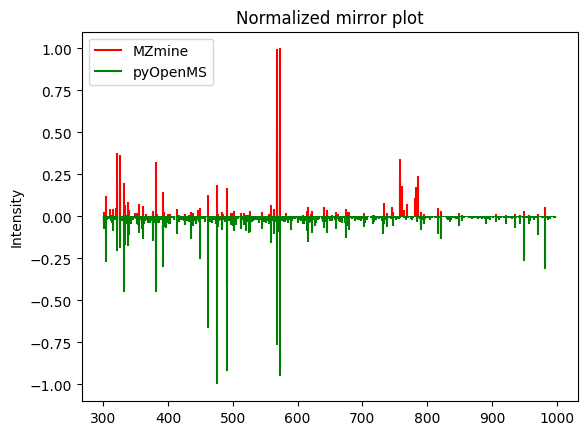

In [19]:
import numpy as np
from matplotlib import pyplot as plt
base_spec = pyspec

mx = np.array(base_spec)[:,1].max()
for b in base_spec:
  plt.vlines(x = b[0], ymin = -b[1]/mx, ymax = 0,
            colors = 'green',
            label = 'pyOpenMS')

query = mzspec

mx = np.array(query)[:,1].max()  
for q in query:
  plt.vlines(x = q[0], ymin = 0, ymax = q[1]/mx,
            colors = 'red',
            label = 'MZmine')
  
plt.title('Normalized mirror plot')
plt.ylabel('Intensity')
leg = plt.legend(labels=['MZmine', 'pyOpenMS'], loc = 'upper left')
leg.legend_handles[0].set_color('red')
leg.legend_handles[1].set_color('green') 

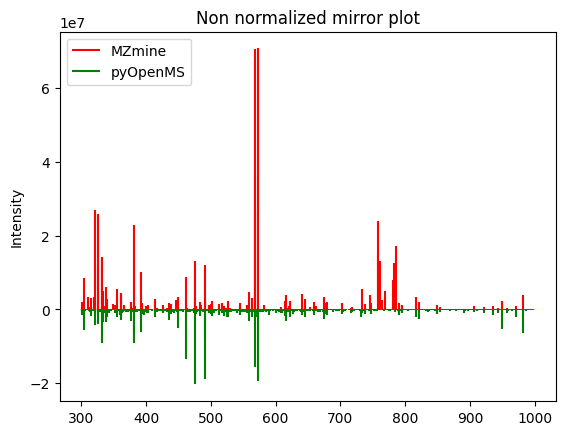

In [18]:
for b in base_spec:
  plt.vlines(x = b[0], ymin = -b[1], ymax = 0,
            colors = 'green',
            label = 'pyOpenMS')
  
for q in query:
  plt.vlines(x = q[0], ymin = 0, ymax = q[1],
            colors = 'red',
            label = 'MZmine')
  
plt.title('Non normalized mirror plot')
plt.ylabel('Intensity')
leg = plt.legend(labels=['MZmine', 'pyOpenMS'], loc = 'upper left')
leg.legend_handles[0].set_color('red')
leg.legend_handles[1].set_color('green') 